In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

import sqlite3
from textblob import TextBlob
from collections import Counter

In [25]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

#### Analysis Points:
    - Top buyers
    - Best Products 
    - Top scores
    - Positive and negative sentiments 
    - Active and Non active buyers
    - Text analysis

### Database connection with sqlite
using sqlite3 connector

In [2]:
conn = sqlite3.connect(r"database.sqlite")

In [3]:
type(conn)

sqlite3.Connection

### Reading the sql file and Data exploration

In [4]:
df = pd.read_sql_query("select * from reviews", conn)

In [5]:
df.shape

(568454, 10)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### About Columns
Id : is dataset row Id <br>
ProductId : Product ID from amazon data <br>
UserId: User who reviewed product <br>
ProfileName : Name of the user <br>
HelpfulnessNumerator : people who found it review helpful <br>
HelpfulnessDenominator : in total who find or not find review helpful <br>
Score : Rating stars <br>
Time : timeof review <br>
Summary : Review Top heading  <br>
Test : Review Text

In [8]:
# df.columns
for col in df.columns:
    print(col)

Id
ProductId
UserId
ProfileName
HelpfulnessNumerator
HelpfulnessDenominator
Score
Time
Summary
Text


In [17]:
df.describe(include=object)

,ProductId,UserId,ProfileName,Summary,Text
count,568454,568454,568454,568454,568454
unique,74258,256059,218418,295744,393579
top,B007JFMH8M,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",Delicious!,"This review will make me sound really stupid, ..."
freq,913,448,451,2462,199


In [13]:
len(df)

568454

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


### Finding and removing invalid data

In [23]:
# HelpfulnessNumerator should be lesser than HelpfulnessDenominator
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']
# should not be true.

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [40]:
# two rows where above condition is true. these are invalid rows.
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [9]:
# valid rows after above two rows 
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [10]:
df_valid.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df_valid.shape

(568452, 10)

### Looking into duplicate rows

In [13]:
data = df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [15]:
# no duplicates 

data.shape

(393931, 10)

In [16]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [18]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [26]:
data['Time']=pd.to_datetime(data['Time'], unit='s')

In [28]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [31]:
data['ProfileName'].nunique()

218418

In [33]:
data['UserId'].nunique()

256059

### Most Important Customers For New Products Recommendations 

In [42]:
main_df = data.groupby(['UserId']).agg({
        'ProductId': 'count',
         'Summary':'count',
         'Text': 'count', 
         'Score': 'mean'}
    ).sort_values(by="ProductId", ascending=False)

In [51]:
main_df.columns = ['products_purchased','total_summaries','text_count','avg_score']

In [52]:
# Top 25 customers 

main_df.head(25)

,products_purchased,total_summaries,text_count,avg_score
UserId,,,,
AY12DBB0U420B,329,329,329,4.659574
A3OXHLG6DIBRW8,278,278,278,4.546763
A281NPSIMI1C2R,259,259,259,4.787645
A1YUL9PCJR3JTY,214,214,214,4.621495
A1Z54EM24Y40LL,211,211,211,4.383886
A2MUGFV2TDQ47K,161,161,161,3.826087
A3D6OI36USYOU1,146,146,146,4.417808
AZV26LP92E6WU,129,129,129,4.852713
AKMEY1BSHSDG7,119,119,119,4.747899


In [53]:
# Top 10 customers User Ids
main_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [54]:
# Top 10 purchases count

main_df['products_purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

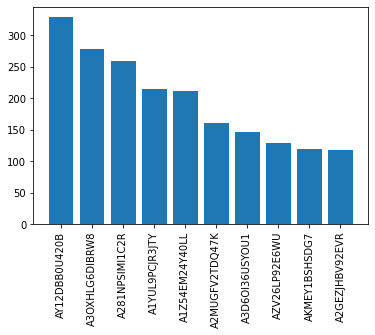

In [56]:
plt.bar(main_df.index[0:10], main_df['products_purchased'][0:10].values)
plt.xticks(rotation='vertical')

### Products with most reviews & Frequently sold products

In [57]:
# unique products in data
data['ProductId'].nunique()

67624

In [59]:
products_sold_count = data['ProductId'].value_counts().to_frame()

In [61]:
products_sold_count.head(25)

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [78]:
# products count sold more than 300 times
frequent_products = products_sold_count[products_sold_count['ProductId'] > 500].index

In [79]:
# create a dataframe only for these products
frequent_products_df = data[data['ProductId'].isin(frequent_products)]

In [80]:
frequent_products_df.shape

(6504, 10)

In [89]:
# Total number of products where Score is 5

frequent_products_df[frequent_products_df['Score'] == 5].shape[0]

4359

<AxesSubplot:xlabel='count', ylabel='ProductId'>

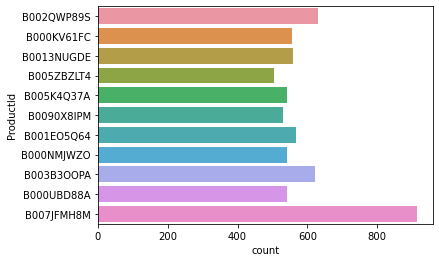

In [90]:
# most sold products plot as found in products_sold_count dataframe
sns.countplot(y='ProductId', data=frequent_products_df)

<AxesSubplot:xlabel='count', ylabel='ProductId'>

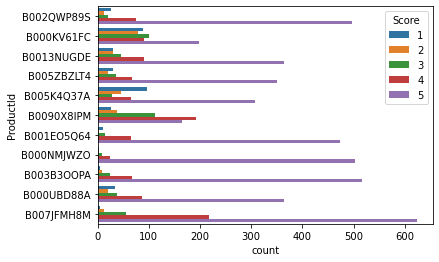

In [84]:
# products with scores count thus most sold 
sns.countplot(y='ProductId', data=frequent_products_df, hue='Score')

#### Product Id : B007JFMH8M has received score of five more than 600 times and sold over 900 times

### Frequent Buyers Vrs Not frequent Buyers
Customers who have brought more than 10 times

In [95]:
freq_buyers = data['UserId'].value_counts()
# user ids with most products buying 
freq_buyers

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [96]:
# creating a new column buyer_type for each user with two values; frequent and not frequent
data['buyers_type'] = data['UserId'].apply(lambda user : 'Frequent' if freq_buyers[user] > 10 else 'Not frequent' )

In [97]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,buyers_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not frequent


In [112]:
data[data['buyers_type']=='Frequent'].count()

Id                        46538
ProductId                 46538
UserId                    46538
ProfileName               46538
HelpfulnessNumerator      46538
HelpfulnessDenominator    46538
Score                     46538
Time                      46538
Summary                   46538
Text                      46538
buyers_type               46538
dtype: int64

In [113]:
not_frequent_buyers = data[data['buyers_type'] == 'Not frequent']
frequent_buyers = data[data['buyers_type']=='Frequent']

In [114]:
# frequent buyers data 
frequent_buyers['Score'].value_counts()

5    25636
4    10360
3     5617
2     2688
1     2237
Name: Score, dtype: int64

In [117]:
# frequent buyers data percentage
frequent_buyers['Score'].value_counts() / len(frequent_buyers) * 100

5    55.086166
4    22.261378
3    12.069706
2     5.775925
1     4.806825
Name: Score, dtype: float64

In [118]:
#Not frequnet buyers
not_frequent_buyers['Score'].value_counts()

5    225325
4     45733
1     34069
3     24152
2     18114
Name: Score, dtype: int64

In [119]:
# frequent buyers data percentage
not_frequent_buyers['Score'].value_counts() / len(not_frequent_buyers) * 100

5    64.861698
4    13.164629
1     9.807049
3     6.952357
2     5.214267
Name: Score, dtype: float64

<AxesSubplot:>

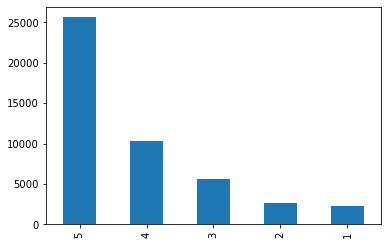

In [116]:
frequent_buyers['Score'].value_counts().plot(kind="bar")

<AxesSubplot:>

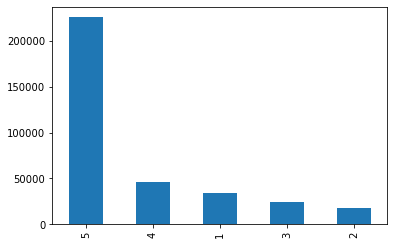

In [120]:
not_frequent_buyers['Score'].value_counts().plot(kind="bar")

### Analyzing User Reviews Text

In [122]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [125]:
def calculate_text_length(text):
    return len(text.split(' '))

In [127]:
data['Text_length'] = data['Text'].apply(calculate_text_length)

In [128]:
not_frequent_buyers_data = data[data['buyers_type'] == 'Not frequent']
frequent_buyers_data = data[data['buyers_type']=='Frequent']

In [129]:
not_frequent_buyers_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,buyers_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not frequent,30


In [138]:
# buyers whos reviews text contain more than 500 words
frequent_buyers_data[frequent_buyers_data['Text_length'] > 500].shape

(671, 12)

In [139]:
# not frequnet buyers whos reviews text contain more than 500 words
not_frequent_buyers_data[not_frequent_buyers_data['Text_length'] > 500].shape

(962, 12)

(0.0, 600.0)

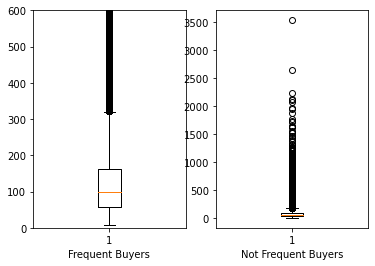

In [133]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.boxplot(frequent_buyers_data['Text_length'])
ax1.set_xlabel('Frequent Buyers')
ax1.set_ylim(0, 600)


ax2 = fig.add_subplot(122)
ax2.boxplot(not_frequent_buyers_data['Text_length'])
ax2.set_xlabel('Not Frequent Buyers')
ax1.set_ylim(0, 600)

### Sentiment Analysis - and most commn words used : positive and negative

In [142]:
data.shape

(393931, 12)

In [143]:
sample_data = data[0:100000]

In [144]:
sentiment_polarity_list = []

for text in sample_data['Summary']:
    try:
        sentiment_polarity_list.append(TextBlob(text).sentiment.polarity)
    except:
        sentiment_polarity_list.append(0)

In [145]:
len(sentiment_polarity_list)

100000

In [146]:
sample_data['polarity'] = sentiment_polarity_list

In [147]:
sample_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,buyers_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not frequent,30,0.8


In [159]:
# negative
# sample_data[sample_data['polarity'] > 0].shape
negative_sentiment_df = sample_data[sample_data['polarity'] < 0]

In [160]:
# positive 
# sample_data[sample_data['polarity'] < 0]
positive_sentiment_df = sample_data[sample_data['polarity'] > 0]

In [164]:
# most common negative words used
Counter(negative_sentiment_df['Summary']).most_common(10)

[('Disappointed', 90),
 ('Disappointing', 58),
 ('Not what I expected', 34),
 ('Bland', 31),
 ('disappointed', 31),
 ('Terrible', 29),
 ('Horrible', 29),
 ('Awful', 24),
 ('Disgusting', 22),
 ('Not good', 21)]

In [165]:
# most common positive wrds used 
Counter(positive_sentiment_df['Summary']).most_common(10)

[('Delicious!', 438),
 ('Delicious', 407),
 ('Great product', 199),
 ('Excellent', 176),
 ('Great Product', 154),
 ('Love it!', 153),
 ('Great', 144),
 ('Great!', 120),
 ('Awesome', 106),
 ('Great Coffee', 101)]